<IPython.core.display.Javascript object>


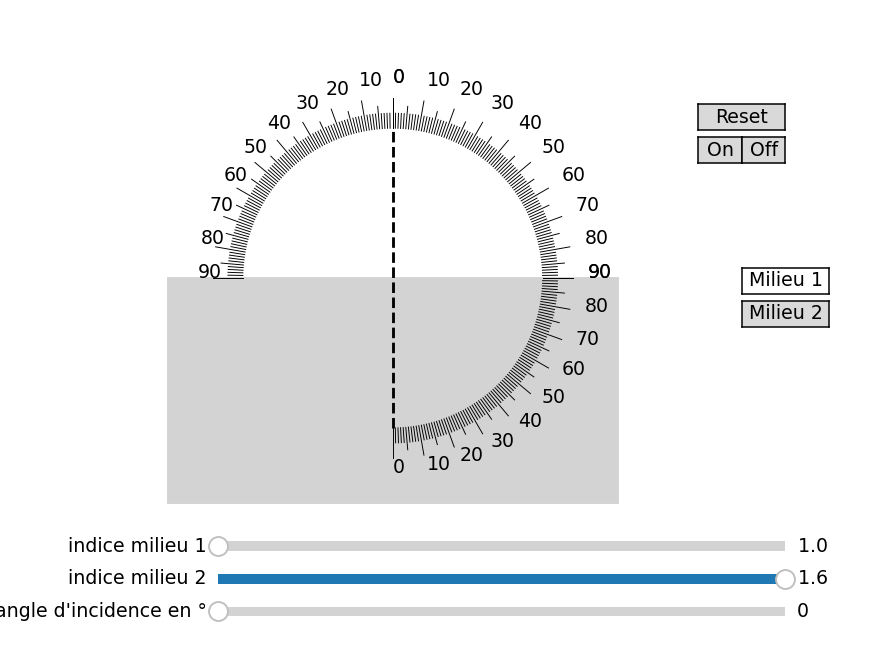

In [2]:
# Isabelle Schanen 06/01/2022 La Prepa des INP Grenoble
%matplotlib notebook
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.patches import Rectangle, Polygon
# ajout curseur et bouton
from matplotlib.widgets import Slider, Button

# les paramètres angle sont exprimés en degrés
def dessine_rapporteur(x, y, r, angle_depart=0, angle_tot=180, sens=0):
    r = 1.0
    longueur_court = 0.1
    longueur_moyen = 0.15
    longueur_long = 0.2

    for n in range(angle_tot+1):
        angle = pi*(n+angle_depart)/180
        X, Y = r*cos(angle), r*sin(angle)
        longueur = longueur_court
        if (n%5==0):
            longueur = longueur_moyen
            if (n%10==0):
                longueur = longueur_long
                if sens == 0 :
                    plt.annotate(str(n), (x+1.3*X, y+1.3*Y))
                else :
                    plt.annotate(str(angle_tot-n), (x+1.3*X, y+1.3*Y))
        plt.plot([x+X,x+(1+longueur)*X], [y+Y, y+(1+longueur)*Y], linewidth=0.5, color='black')
    return

fig, ax = plt.subplots()
plt.subplots_adjust(left=0, bottom=0.20)
ax.set_xlim(-2, 2)
plt.axis('equal'), plt.axis('off')
# ajout normale
plt.plot([0,0], [-1, 1], linestyle='dashed', c='k')
# rayons
incident, = plt.plot([], [], color = 'red')
reflechi, = plt.plot([], [], color = 'red', alpha = None)
transmis, = plt.plot([], [], color = 'red', alpha = None)



def rayon(i, ni, nr):
    i = pi * i/180
    r = arcsin(ni*sin(i)/nr)
    # rayon incident
    xi, yi =  -longueur * sin(i), longueur * cos(i)
    # rayon réfracté
    xr, yr = longueur * sin(r), -longueur * cos(r)
    # rayon réfléchi
    xrf, yrf = longueur * sin(i), longueur * cos(i)
    # calcul coef fresnel onde TE
    if ni > nr and sin(i) >= nr/ni:
        (rTE, alpha_rf, alpha_r) = (1,1,0)
    else :
        rTE = (ni * cos(i) - nr * cos(r))/(ni * cos(i) + nr * cos(r))
        alpha_rf = rTE * rTE
        alpha_r = 1 - alpha_rf
    #print(rTE, alpha_rf, alpha_r)
    # actualisation des rayons
    incident.set_data([xi, 0], [yi, 0])
    reflechi.set_data([0, xrf], [0, yrf])
    transmis.set_data([0, xr], [0, yr])
    reflechi.set_alpha(alpha_rf)
    transmis.set_alpha(alpha_r)
    plt.draw()


def update(val):
    ni = s_indice1.val
    nr = s_indice2.val
    i = s_angle.val
    #print(ni, nr, i)
    rayon(i, ni, nr)
    fig.canvas.draw_idle()

dessine_rapporteur(0,0,1., 90, 90, 0)
dessine_rapporteur(0,0,1., 0, 90, 1)
dessine_rapporteur(0,0,1., 270, 90, 0)


ax.add_patch(Rectangle((-1.5, -1.5), 3, 1.5, color='lightgrey'))
# ajout label milieu 1 et milieu 2
button = Button(plt.axes([0.85, 0.55, 0.1, 0.04]), 'Milieu 1', color = 'white')
button = Button(plt.axes([0.85, 0.5, 0.1, 0.04]), 'Milieu 2')
# ajout curseur indices des  milieux et angle d'incidence
ax_indice1 = plt.axes([0.25, 0.15, 0.65, 0.03])
s_indice1 = Slider(ax_indice1, "indice milieu 1", 1, 1.6, valinit=1)
ax_indice2 = plt.axes([0.25, 0.1, 0.65, 0.03])
s_indice2 = Slider(ax_indice2, "indice milieu 2", 1, 1.6, valinit=1.6)
ax_angle = plt.axes([0.25, 0.05, 0.65, 0.03])
s_angle = Slider(ax_angle, "angle d'incidence en °", 0, 90, valinit=0, color = 'red', valfmt='%1.0f')


# remise à l'initial des paramètres
r_button = Button(plt.axes([0.8, 0.8, 0.1, 0.04]), 'Reset')

def reset(event):
    s_indice1.reset()
    s_indice2.reset()
    s_angle.reset()

r_button.on_clicked(reset)

# mise en route du laser
on_button = Button(plt.axes([0.8, 0.75, 0.05, 0.04]), 'On')
off_button = Button(plt.axes([0.85, 0.75, 0.05, 0.04]), 'Off')

def on(event):
    # affichage du rayon
    incident.set_data([0, 0], [1, 0])
    reflechi.set_data([0, 0], [0, 1])
    transmis.set_data([0, 0], [0, -1])
    plt.draw()

def off(event):
    # remise à l'état initial des paramètres
    s_angle.reset()
    # extinction du rayon
    incident.set_data([], [])
    reflechi.set_data([], [])
    transmis.set_data([], [])
    plt.draw()

on_button.on_clicked(on)
off_button.on_clicked(off)

#ni, nr, longueur = 1, 1.3, 1.3
longueur = 1.3
s_indice1.on_changed(update)
s_indice2.on_changed(update)
s_angle.on_changed(update)


plt.show()